In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Changing names of Images in Directory

In [3]:
folder = 'Tumor_Dataset/glioma/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "glioma_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the glioma dir.")

All files are renamed in the glioma dir.


In [4]:
folder = 'Tumor_Dataset/meningioma/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "meningioma_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the meningioma dir.")

All files are renamed in the meningioma dir.


In [5]:
folder = 'Tumor_Dataset/notumor/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "notumor_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the notumor dir.")

All files are renamed in the notumor dir.


In [6]:
folder = 'Tumor_Dataset/pituitary/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "pituitary_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the pituitary dir.")

All files are renamed in the pituitary dir.


# EDA(Exploratory Data Analysis)

In [10]:
# List of tumor types
tumor_types = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Dictionary to store the number of files in each tumor type
file_counts = {}

# Loop through each tumor type folder and save the number of files in a variable
for tumor in tumor_types:
    listTumor = os.listdir(f"Tumor_Dataset/{tumor}/")
    number_files_tumor = len(listTumor)
    file_counts[tumor] = number_files_tumor
    print(f"Number of files in {tumor}: {number_files_tumor}")

# Access the number of files using the variables
number_files_glioma = file_counts['glioma']
number_files_meningioma = file_counts['meningioma']
number_files_notumor = file_counts['notumor']
number_files_pituitary = file_counts['pituitary']


Number of files in glioma: 1621
Number of files in meningioma: 1645
Number of files in notumor: 2000
Number of files in pituitary: 1757


In [11]:
#plot

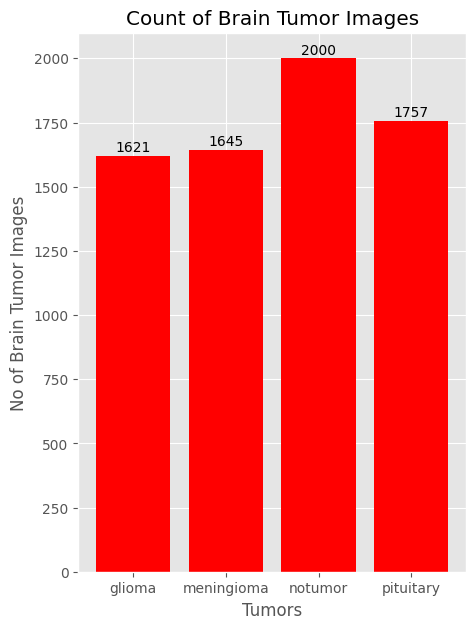

In [14]:
import matplotlib.pyplot as plt

typex = file_counts.keys()
values = file_counts.values()

fig = plt.figure(figsize=(5, 7))

plt.bar(typex, values, color="red")

plt.xlabel("Tumors")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")

# Adding the count on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  # Adjust the position with value + 5

plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [17]:
def data_summary(main_path):
    # Define paths for each tumor type
    glioma_path = os.path.join(main_path, "glioma/")
    meningioma_path = os.path.join(main_path, "meningioma/")
    pituitary_path = os.path.join(main_path, "pituitary/")
    no_tumor_path = os.path.join(main_path, "notumor/")
    
    # Count the number of images in each directory
    n_glioma = len(os.listdir(glioma_path))
    n_meningioma = len(os.listdir(meningioma_path))
    n_pituitary = len(os.listdir(pituitary_path))
    n_no_tumor = len(os.listdir(no_tumor_path))
    
    # Total number of samples
    n_total = n_glioma + n_meningioma + n_pituitary + n_no_tumor
    
    # Calculate percentages
    glioma_per = (n_glioma * 100) / n_total
    meningioma_per = (n_meningioma * 100) / n_total
    pituitary_per = (n_pituitary * 100) / n_total
    no_tumor_per = (n_no_tumor * 100) / n_total
    
    # Print results
    print(f"Total number of samples: {n_total}\n")
    
    print(f"Glioma samples: {n_glioma} ({glioma_per:.2f}%)")
    print(f"Meningioma samples: {n_meningioma} ({meningioma_per:.2f}%)")
    print(f"Pituitary samples: {n_pituitary} ({pituitary_per:.2f}%)")
    print(f"No tumor samples: {n_no_tumor} ({no_tumor_per:.2f}%)")

# Example usage
main_path = 'Tumor_Dataset/'  # Replace with your actual path
data_summary(main_path)


Total number of samples: 7023

Glioma samples: 1621 (23.08%)
Meningioma samples: 1645 (23.42%)
Pituitary samples: 1757 (25.02%)
No tumor samples: 2000 (28.48%)


# Data Preprocessing

In [19]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [20]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    # Step 1: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if plot:
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 3, 1)
        plt.imshow(gray, cmap='gray')
        plt.title('Grayscale Image')

    # Step 2: Apply Gaussian Blur
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    if plot:
        plt.subplot(2, 3, 2)
        plt.imshow(gray, cmap='gray')
        plt.title('Gaussian Blurred Image')

    # Step 3: Apply Thresholding
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    if plot:
        plt.subplot(2, 3, 3)
        plt.imshow(thres, cmap='gray')
        plt.title('Thresholded Image')

    # Step 4: Morphological Operations
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)
    if plot:
        plt.subplot(2, 3, 4)
        plt.imshow(thres, cmap='gray')
        plt.title('Morphological Operations')

    # Step 5: Find Contours
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Step 6: Extract Contour Coordinates
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # Step 7: Crop the Image
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    if plot:
        plt.subplot(2, 3, 5)
        plt.imshow(new_image)
        plt.title('Cropped Image')

    # Plot original image for comparison
    if plot:
        plt.subplot(2, 3, 6)
        plt.imshow(image)
        plt.title('Original Image')
        plt.tight_layout()
        plt.show()

    return new_image


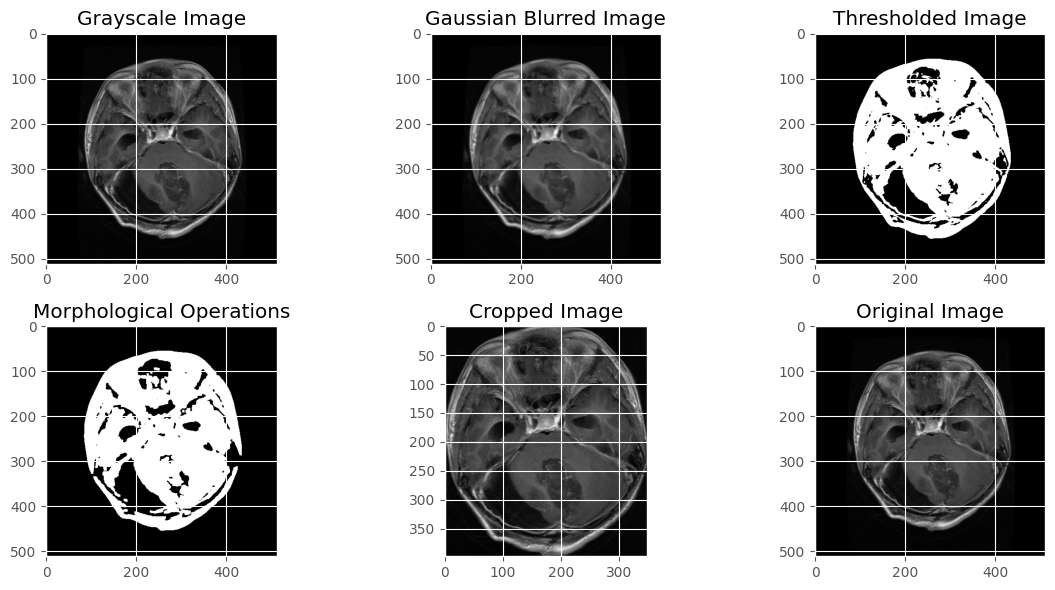

array([[[4, 4, 4],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [1, 1, 1],
        [0, 0, 0]],

       [[4, 4, 4],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [1, 1, 1],
        [0, 0, 0]],

       [[5, 5, 5],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [0, 0, 0]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)

In [21]:
img = cv2.imread('Tumor_Dataset/glioma/glioma_1.jpg')
crop_brain_tumor(img, True)

In [24]:
Tumor_folder=['Tumor_Dataset/glioma/','Tumor_Dataset/meningioma/','Tumor_Dataset/notumor/','Tumor_Dataset/pituitary/']
for folder1 in Tumor_folder:
    for filename in os.listdir(folder1):
        img = cv2.imread(folder1 + filename)
        img = crop_brain_tumor(img, False)
        cv2.imwrite(folder1 + filename, img)

# image loading and Plotting

In [28]:
from sklearn.utils import shuffle
import cv2
import os
import numpy as np

# Tumor_Dataset/glioma, Tumor_Dataset/meningioma, Tumor_Dataset/notumor, Tumor_Dataset/pituitary

def load_data(dir_list, image_size):
    X = []
    y = []
    
    image_width, image_height = image_size
    
    # Mapping directory names to class labels
    label_mapping = {
        'glioma': 0,
        'meningioma': 1,
        'notumor': 2,
        'pituitary': 3
    }
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            
            if image is None:
                print(f"Failed to load image: {image_path}")
                continue
            
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            image = image / 255.0  # Normalize the image
            
            X.append(image)
            
            # Extract folder name and assign corresponding label
            folder_name = os.path.basename(directory)
            label = label_mapping.get(folder_name, -1)  # Get the label or -1 if not found
            
            if label != -1:
                y.append(label)
            else:
                print(f"Unknown folder: {folder_name}, skipping")
    
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f"Number of examples: {len(X)}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    
    return X, y

# Usage example:
Tumor_folders = [
    'Tumor_Dataset/glioma', 
    'Tumor_Dataset/meningioma', 
    'Tumor_Dataset/notumor', 
    'Tumor_Dataset/pituitary'
]

image_size = (128, 128)  # Example size
X, y = load_data(Tumor_folders, image_size)


Number of examples: 7023
X shape: (7023, 128, 128, 3)
y shape: (7023,)


In [31]:
def plot_sample_images(X, y, n=50):
    tumor_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
    label_to_index = {label: index for index, label in enumerate(tumor_labels)}  # Map labels to indices

    for label in tumor_labels:
        # Get the index for the current label
        label_index = label_to_index[label]
        
        # Extract images corresponding to the current label
        images = X[np.argwhere(y == label_index)]
        
        # Select the first n images for display
        n_images = images[:n]

        # Set up the subplot grid
        columns_n = 10
        rows_n = int(n / columns_n)

        plt.figure(figsize=(20, 10))

        for i, image in enumerate(n_images):
            plt.subplot(rows_n, columns_n, i + 1)  # Using i + 1 to start subplot indexing from 1
            plt.imshow(image[0])  # Display the image, image[0] to remove extra dimension
            plt.axis('off')  # Disable axis ticks and labels

        plt.suptitle(f"Brain Tumor: {label}")
        plt.show()

# Example usage
# plot_sample_images(X, y, n=50)  # X and y should be your dataset


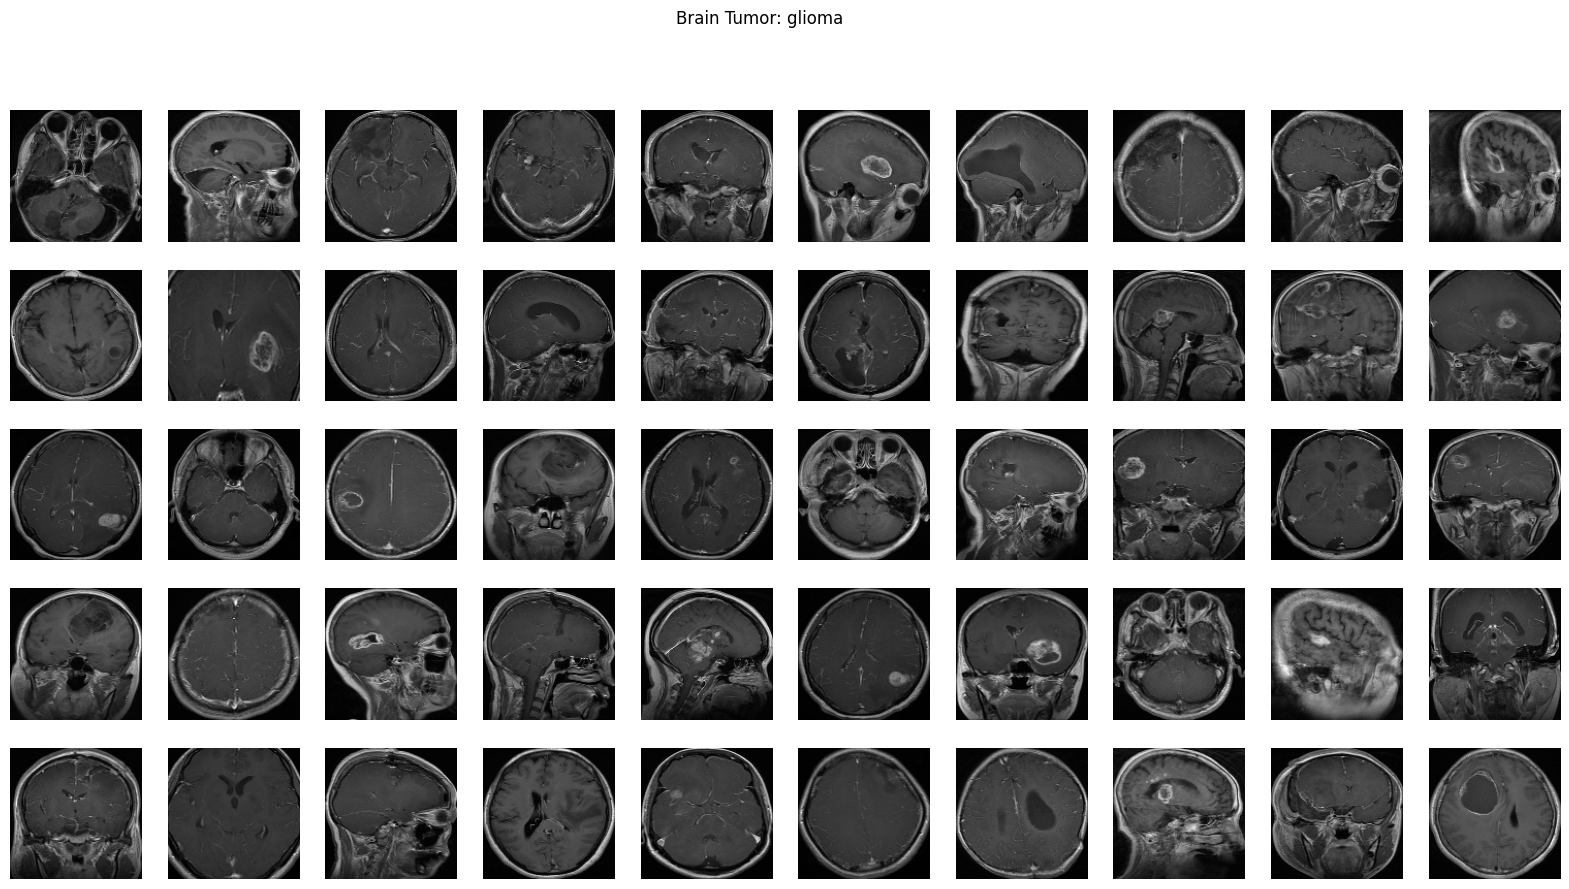

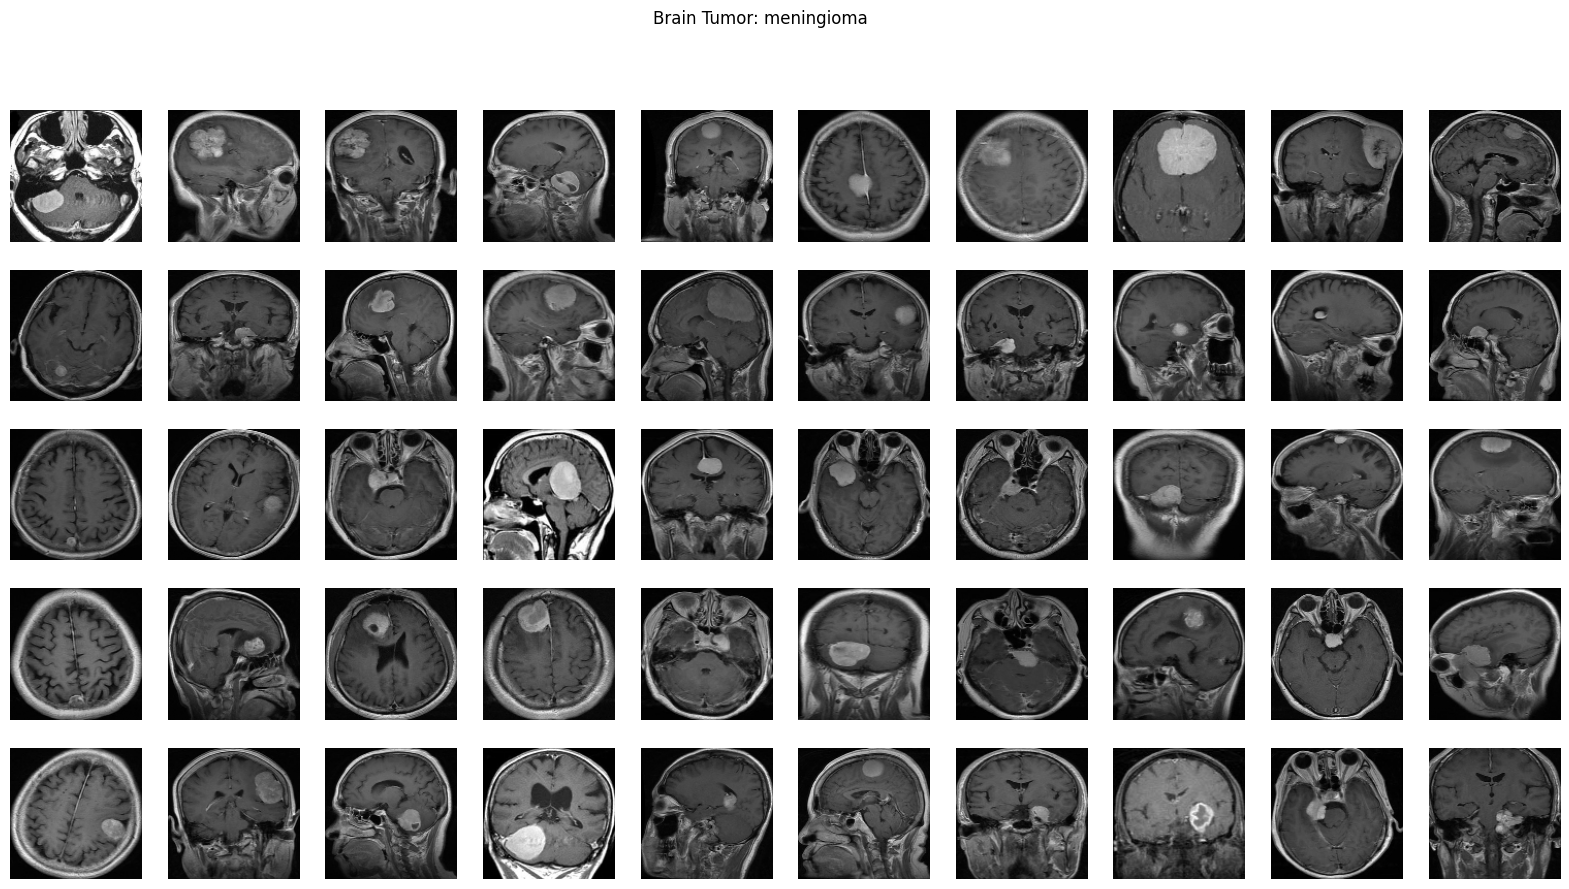

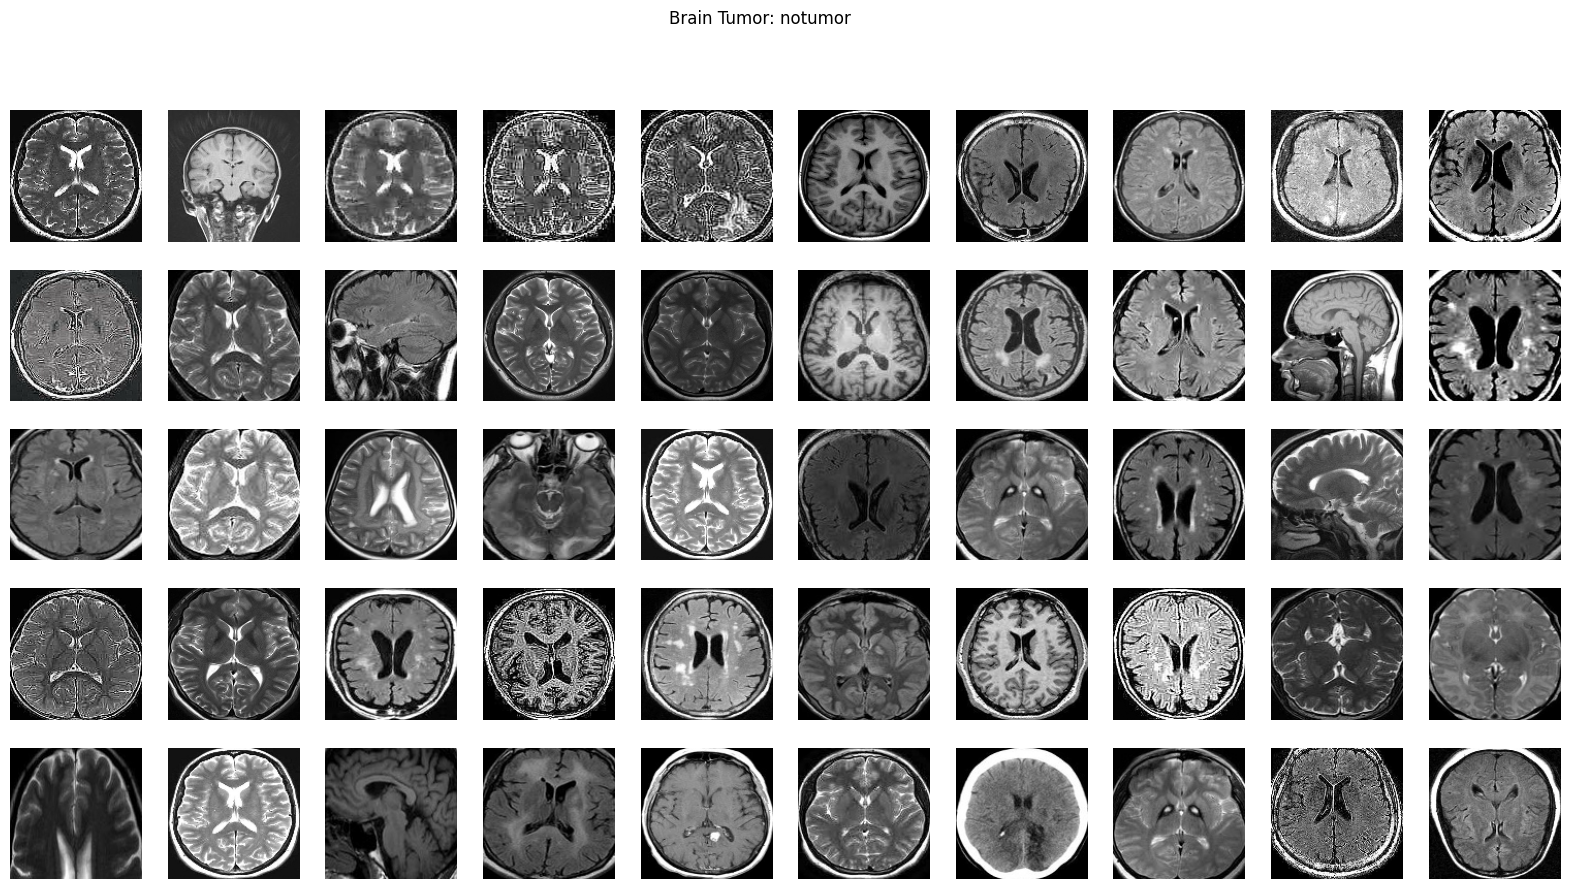

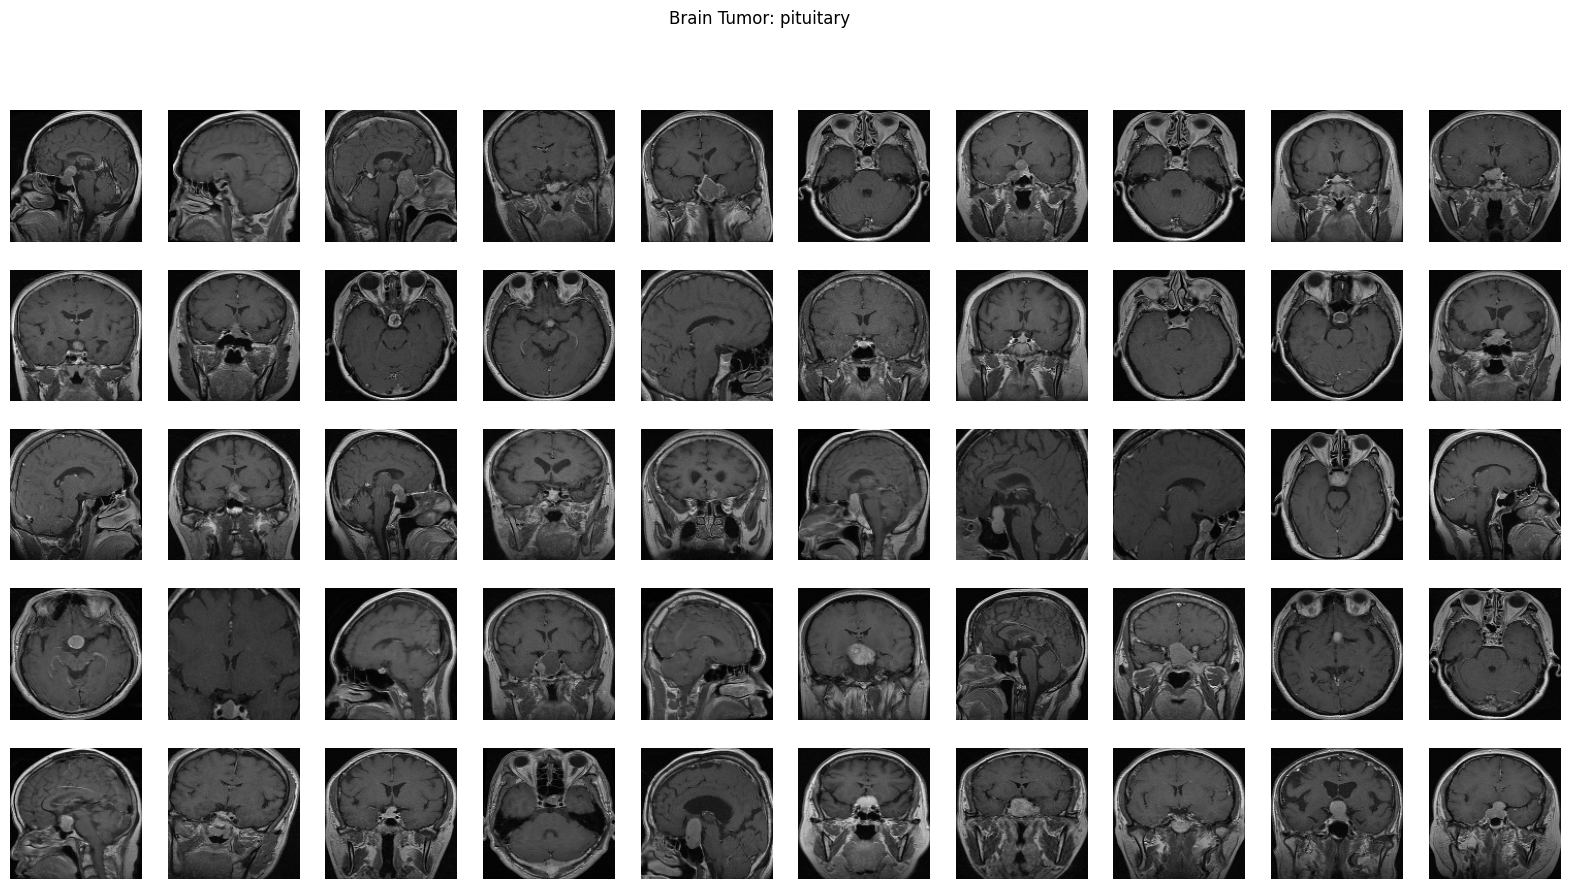

In [32]:
plot_sample_images(X,y)

# Data Spliting
# Train
# Test
# Validation

In [34]:
#Folder Creation for test train valid

In [47]:
if not os.path.isdir('Final_Dataset'):
    base_dir = 'Final_Dataset'
    os.mkdir(base_dir)

In [48]:
if not os.path.isdir('Final_Dataset/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('Final_Dataset/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('Final_Dataset/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [49]:
import os

# Define the base directories for train, test, and validation
train_dir = 'Final_Dataset/train'
test_dir = 'Final_Dataset/test'
valid_dir = 'Final_Dataset/valid'

# Define the tumor types
tumor_types = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Create directories for training, testing, and validation sets for each tumor type
for tumor in tumor_types:
    # Create train directories
    if not os.path.isdir(os.path.join(train_dir, tumor)):
        os.mkdir(os.path.join(train_dir, tumor))
        print(f"Created directory: {os.path.join(train_dir, tumor)}")

    # Create test directories
    if not os.path.isdir(os.path.join(test_dir, tumor)):
        os.mkdir(os.path.join(test_dir, tumor))
        print(f"Created directory: {os.path.join(test_dir, tumor)}")

    # Create validation directories
    if not os.path.isdir(os.path.join(valid_dir, tumor)):
        os.mkdir(os.path.join(valid_dir, tumor))
        print(f"Created directory: {os.path.join(valid_dir, tumor)}")


Created directory: Final_Dataset/train\glioma
Created directory: Final_Dataset/test\glioma
Created directory: Final_Dataset/valid\glioma
Created directory: Final_Dataset/train\meningioma
Created directory: Final_Dataset/test\meningioma
Created directory: Final_Dataset/valid\meningioma
Created directory: Final_Dataset/train\pituitary
Created directory: Final_Dataset/test\pituitary
Created directory: Final_Dataset/valid\pituitary
Created directory: Final_Dataset/train\notumor
Created directory: Final_Dataset/test\notumor
Created directory: Final_Dataset/valid\notumor


In [55]:
import os
import shutil
import math
import random  # Import random module

# Define the original dataset directory
original_dataset_dir = 'Tumor_Dataset'
final_train_dir = 'Final_Dataset/train'
final_valid_dir = 'Final_Dataset/valid'
final_test_dir = 'Final_Dataset/test'

# Define the tumor types and their respective counts
tumor_types = {
    'glioma': 1621,
    'meningioma': 1645,
    'pituitary': 1757,
    'notumor': 2000,
}

# Define split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Function to split dataset
def split_dataset(tumor_types):
    for tumor, total_count in tumor_types.items():
        # Check if the directory exists and contains files
        tumor_dir = os.path.join(original_dataset_dir, tumor)
        if not os.path.exists(tumor_dir) or not os.listdir(tumor_dir):
            raise ValueError(f"No files found in directory: {tumor_dir}")

        # Calculate the number of images for each set
        train_count = math.floor(total_count * train_ratio)
        valid_count = math.floor(total_count * valid_ratio)
        test_count = total_count - train_count - valid_count  # Remainder for test

        print(f"{tumor} - Train: {train_count}, Valid: {valid_count}, Test: {test_count}")

        # Create target directories if they don't exist
        os.makedirs(os.path.join(final_train_dir, tumor), exist_ok=True)
        os.makedirs(os.path.join(final_valid_dir, tumor), exist_ok=True)
        os.makedirs(os.path.join(final_test_dir, tumor), exist_ok=True)

        # Get the list of files for the current tumor type
        files = os.listdir(tumor_dir)
        
        # Shuffle files to ensure randomness
        random.shuffle(files)

        # Check if the counts are valid
        assert len(files) == total_count, f"Error: Expected {total_count} files, found {len(files)} in {tumor}"

        # Copy files to the respective directories
        for i in range(train_count):
            src = os.path.join(tumor_dir, files[i])
            dst = os.path.join(final_train_dir, tumor, files[i])
            shutil.copyfile(src, dst)

        for i in range(train_count, train_count + valid_count):
            src = os.path.join(tumor_dir, files[i])
            dst = os.path.join(final_valid_dir, tumor, files[i])
            shutil.copyfile(src, dst)

        for i in range(train_count + valid_count, total_count):
            src = os.path.join(tumor_dir, files[i])
            dst = os.path.join(final_test_dir, tumor, files[i])
            shutil.copyfile(src, dst)

# Call the function to split the dataset
split_dataset(tumor_types)

print("Dataset splitting completed.")


glioma - Train: 1134, Valid: 243, Test: 244
meningioma - Train: 1151, Valid: 246, Test: 248
pituitary - Train: 1229, Valid: 263, Test: 265
notumor - Train: 1400, Valid: 300, Test: 300
Dataset splitting completed.


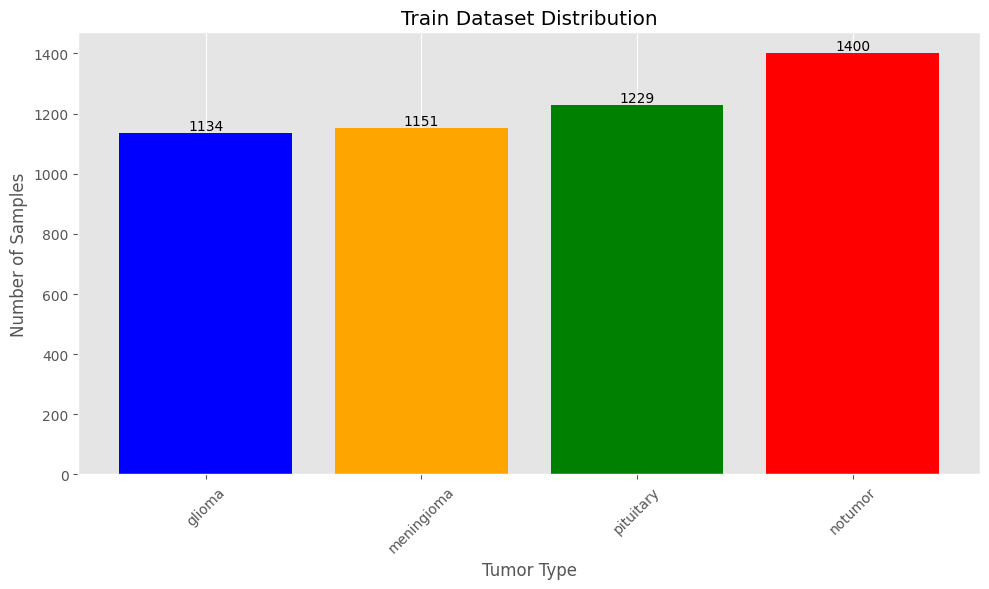

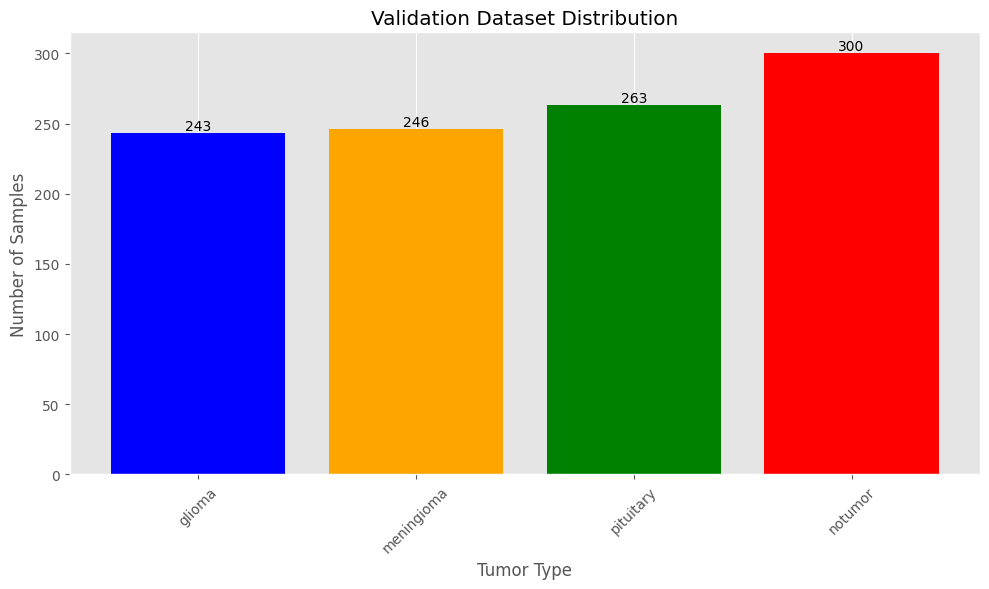

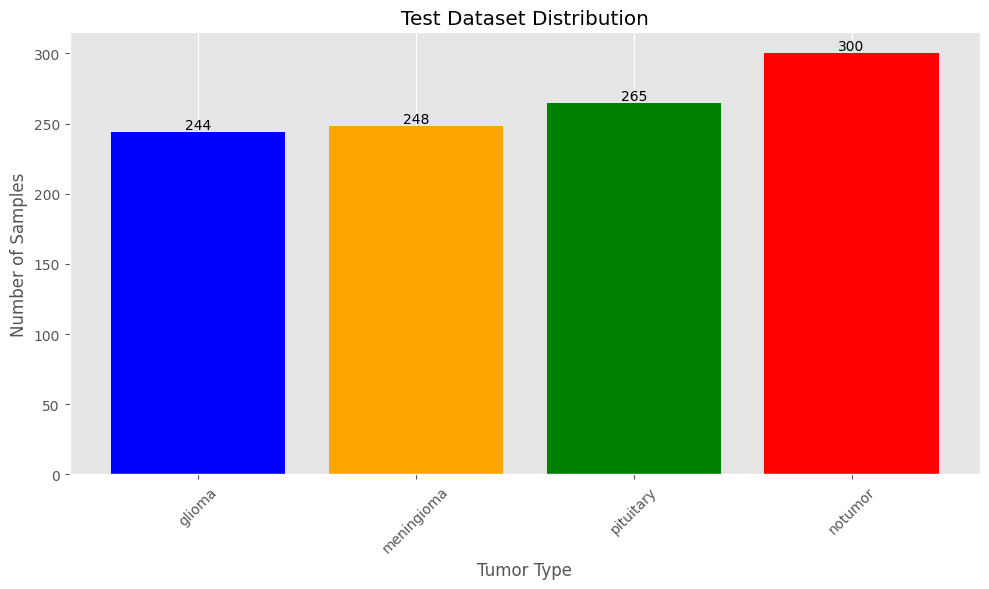

In [56]:
import os
import matplotlib.pyplot as plt

# Define the base directories for your datasets
base_train_dir = 'Final_Dataset/train'
base_valid_dir = 'Final_Dataset/valid'
base_test_dir = 'Final_Dataset/test'

# Function to count files in each tumor type directory
def count_files(base_dir):
    counts = {}
    tumor_types = ['glioma', 'meningioma', 'pituitary', 'notumor']
    
    for tumor in tumor_types:
        tumor_dir = os.path.join(base_dir, tumor)
        # Count the number of files in the directory
        counts[tumor] = len(os.listdir(tumor_dir))
    
    return counts

# Function to create a bar chart with counts on top of bars
def create_bar_chart(data, title):
    labels = data.keys()
    sizes = data.values()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, sizes, color=['blue', 'orange', 'green', 'red'])
    
    # Adding counts on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.xlabel('Tumor Type')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Count files in each dataset
train_counts = count_files(base_train_dir)
valid_counts = count_files(base_valid_dir)
test_counts = count_files(base_test_dir)

# Create bar charts for train, valid, and test datasets using the counted values
create_bar_chart(train_counts, "Train Dataset Distribution")
create_bar_chart(valid_counts, "Validation Dataset Distribution")
create_bar_chart(test_counts, "Test Dataset Distribution")


# CNN Base Model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth convolutional layer
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flattening the output for the dense layers
    layers.Flatten(),
    
    # Fully connected layer
    layers.Dense(128, activation='relu'),
    
    # Output layer with softmax activation for multi-class classification
    layers.Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,811,588 (25.98 MB)

 Trainable params: 6,811,588 (25.98 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill pixels after rotation or shifting
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescaling for validation

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescaling for testing


In [7]:
# Define directories
train_dir = 'Final_Dataset/train'
valid_dir = 'Final_Dataset/valid'
test_dir = 'Final_Dataset/test'

# Load training dataset
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Batch size
    class_mode='sparse',  # For sparse categorical crossentropy
    shuffle=True  # Shuffle the training data
)

# Load validation dataset
valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # No need to shuffle validation data
)

# Load test dataset
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # No need to shuffle test data
)


Found 4914 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.
Found 1057 images belonging to 4 classes.


In [8]:
def print_dataset_info(dataset, name):
    print(f"{name} Dataset:")
    print(f"Number of batches: {dataset.n // dataset.batch_size}")
    print(f"Total images: {dataset.n}")
    print(f"Class indices: {dataset.class_indices}")
    print(f"Image shape: {dataset.image_shape}")
    print()

print_dataset_info(train_dataset, "Training")
print_dataset_info(valid_dataset, "Validation")
print_dataset_info(test_dataset, "Test")

Training Dataset:
Number of batches: 153
Total images: 4914
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 3)

Validation Dataset:
Number of batches: 32
Total images: 1052
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 3)

Test Dataset:
Number of batches: 33
Total images: 1057
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 3)



In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',     # Path to save the model file
    save_best_only=True, # Save only the best model based on the monitored metric
    monitor='val_loss'   # Monitor the validation loss
)

# Fit the model with the callbacks
steps_per_epoch = train_dataset.samples // train_dataset.batch_size
validation_steps = valid_dataset.samples // valid_dataset.batch_size

# Fit the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,  # Adjust the number of epochs
    steps_per_epoch=steps_per_epoch,  # Control the number of steps in each epoch
    validation_steps=validation_steps  # Control the number of steps for validation
)


Epoch 1/20


C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.3628 - loss: 1.2985 - val_accuracy: 0.6143 - val_loss: 0.9351
Epoch 2/20
  1/153 ━━━━━━━━━━━━━━━━━━━━ 2:14 886ms/step - accuracy: 0.5000 - loss: 0.9635

C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.9635 - val_accuracy: 0.5357 - val_loss: 1.1434
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.5832 - loss: 0.9617 - val_accuracy: 0.6367 - val_loss: 0.8840
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 0.9560 - val_accuracy: 1.0000 - val_loss: 0.4588
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6455 - loss: 0.8256 - val_accuracy: 0.6631 - val_loss: 0.8478
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.5768 - val_accuracy: 0.7143 - val_loss: 0.6510
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.6971 - loss: 0.7477 - val_accuracy: 0.6553 - val_loss: 0.8584
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.8581 - val_accuracy: 0.9643 - val_loss: 0.3571
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7227 - loss: 0.6939 - val_accuracy: 0.6934 - 

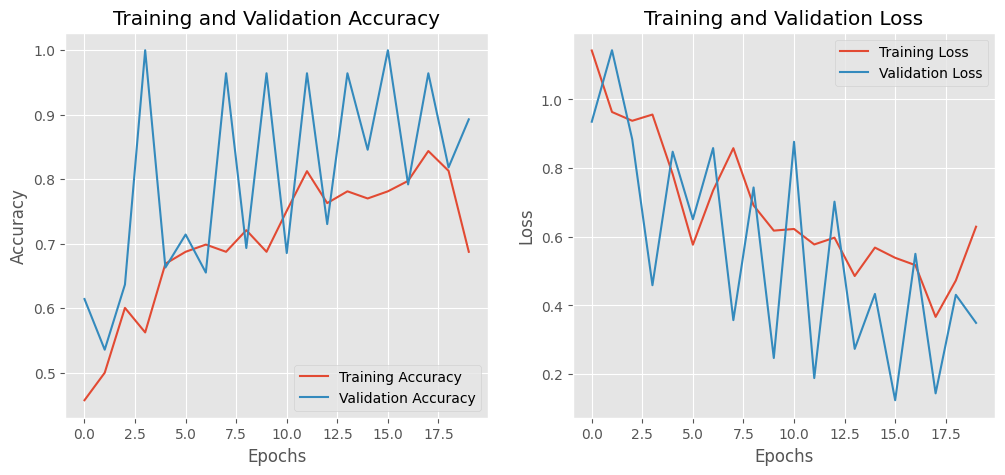

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 376ms/step - accuracy: 0.7864 - loss: 0.5265
Test accuracy: 0.83


# Testing With New Sample

In [91]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the image dimensions and your model's class indices
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256  # Set to your model's input dimensions
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}  # Adjust based on your model's output classes

# Function to predict the tumor type
def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_indices[predicted_class]

    return predicted_label, predictions[0]

# Example usage
img_path = 'Final_Dataset/test/glioma/glioma_1004.jpg'  # Change to your image path
predicted_label, probabilities = predict_tumor_type(img_path)

# Print the result
print(f"Predicted: {predicted_label}")
print("Probabilities:")
for label, prob in zip(class_indices.values(), probabilities):
    print(f"  {label}: {prob:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
Predicted: Meningioma
Probabilities:
  Glioma: 0.25%
  Meningioma: 0.26%
  No Tumor: 0.24%
  Pituitary: 0.24%


In [12]:
import os

# Define the path to your test dataset
test_dir = 'Final_Dataset/test'  # Path to your test dataset

# Define class indices
class_indices = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}

# Initialize the actual_labels dictionary
actual_labels = {}

# Iterate through each class folder
for class_name, class_index in class_indices.items():
    class_folder = os.path.join(test_dir, class_name)  # Path to the specific class folder
    for filename in os.listdir(class_folder):  # List all files in the class folder
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file types
            # Add to the dictionary: filename -> class index
            path=os.path.join(class_folder,filename) 
            actual_labels[path] = class_index

# Print the actual_labels dictionary
print(actual_labels)


{'Final_Dataset/test\\glioma\\glioma_1004.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1016.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1023.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1029.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1030.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1035.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1044.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_105.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1058.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1060.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1065.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1082.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1083.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1091.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1103.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1104.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_111.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1115.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1123.jpg': 0, 'Final_Dataset/test\\glioma\\glioma_1127.jpg': 0, '

# Identifying Number of Wrong Predictions Done By Model For Test Data

In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
from tabulate import tabulate

# Define the image dimensions and your model's class indices
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256  # Set to your model's input dimensions
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}  # Adjust based on your model's output classes

# Function to predict the tumor type
def predict_tumor_type(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

# Path to your test images and actual labels
test_dir = 'Final_Dataset/test'

wrong_predictions = []

# Iterate through the test images
for img_name, true_label in actual_labels.items():
    # Only predict if the image exists
    if os.path.exists(img_name):
        predicted_label = predict_tumor_type(img_name)

        # Check if the prediction is wrong
        if predicted_label != true_label:
            wrong_predictions.append((img_name, class_indices[predicted_label], class_indices[true_label]))

# Print wrong predictions as a table
if wrong_predictions:
    print("Wrong Predictions:",len(wrong_predictions),'/',len(actual_labels))
    print(tabulate(wrong_predictions, headers=["Image Name", "Predicted", "Actual"], tablefmt="grid"))
else:
    print("All predictions were correct!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [52]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have your actual labels and predicted labels
# actual_labels should be the true labels (the class indices)
# predicted_labels should be the labels predicted by your model

# Convert actual_labels to a list of true class indices
true_labels = []
for img_path, true_class in actual_labels.items():
    true_labels.append(true_class)

# Convert predicted_labels to a NumPy array if not already
predicted_labels = np.array([predict_tumor_type(img_path) for img_path in actual_labels.keys()])

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [59]:
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)
# Print the DataFrame
print(report_df)

              precision  recall  f1-score  support
Glioma             0.98    0.69      0.81   244.00
Meningioma         0.62    0.88      0.72   248.00
No Tumor           0.93    0.95      0.94   300.00
Pituitary          0.92    0.80      0.85   265.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.86    0.83      0.83  1057.00
weighted avg       0.87    0.83      0.84  1057.00


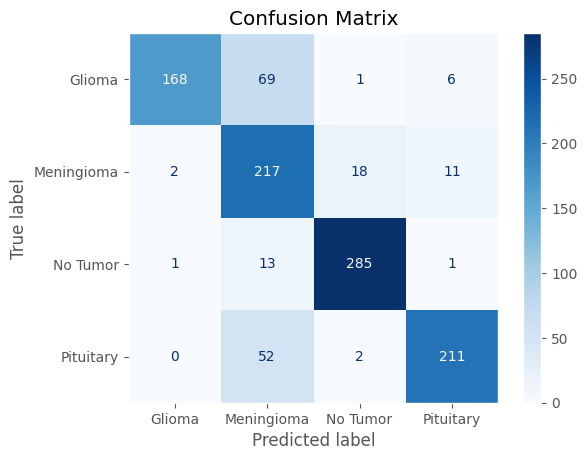

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are your actual labels and predicted labels respectively



# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2, 3])  # Assuming labels are [Glioma, Meningioma, No Tumor, Pituitary]

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()


# Data Augmentation and Second Model with more Dense Layers

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
combined_model = models.Sequential()

# Add convolutional layers
combined_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))  # Adjust input shape if needed
combined_model.add(layers.MaxPooling2D((2, 2)))

combined_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
combined_model.add(layers.MaxPooling2D((2, 2)))

combined_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
combined_model.add(layers.MaxPooling2D((2, 2)))

combined_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
combined_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
combined_model.add(layers.Flatten())

# Add dense layers
combined_model.add(layers.Dense(128, activation='relu'))
combined_model.add(layers.Dense(64, activation='relu'))

# Output layer with 4 categories
combined_model.add(layers.Dense(4, activation='softmax'))

# Compile the model
combined_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
                       metrics=['accuracy'])

# Print the summary of the model
combined_model.summary()


C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,819,012 (26.01 MB)

 Trainable params: 6,819,012 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator


train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       brightness_range=[0.75, 1.25],
                                       rotation_range = 15)
test_datagen_aug = ImageDataGenerator(rescale=1./255)
valid_datagen_aug = ImageDataGenerator(rescale=1.0/255)

In [3]:
# Define directories
train_dir = 'Final_Dataset/train'
valid_dir = 'Final_Dataset/valid'
test_dir = 'Final_Dataset/test'

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,       
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
    seed=1990,
    shuffle=True
)

valid_generator_aug = valid_datagen_aug.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
    seed=1990,
    shuffle=False
)

test_generator_aug = test_datagen_aug.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
    seed=1990,
    shuffle=False
)


Found 4914 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.
Found 1057 images belonging to 4 classes.


In [5]:
# EarlyStopping: Stop training when validation loss stops improving
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# ModelCheckpoint: Save the model after every epoch
mc = ModelCheckpoint('best_s_model.keras', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# ReduceLROnPlateau: Reduce learning rate when validation loss plateaus
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
conv_second_model = combined_model.fit(train_generator_aug,
                       verbose = 1,
                       validation_data = valid_generator_aug, 
                       epochs=50,
                       callbacks=[es, mc, rlr])

Epoch 1/50


C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4072 - loss: 1.2302
Epoch 1: val_loss improved from inf to 0.99269, saving model to best_s_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.4078 - loss: 1.2292 - val_accuracy: 0.6207 - val_loss: 0.9927 - learning_rate: 0.0010
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6380 - loss: 0.8258
Epoch 2: val_loss improved from 0.99269 to 0.68280, saving model to best_s_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6382 - loss: 0.8255 - val_accuracy: 0.7167 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7149 - loss: 0.7116
Epoch 3: val_loss improved from 0.68280 to 0.58608, saving model to best_s_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.7150 - loss: 0.7113 - val_accuracy: 0.7652 - val_loss: 0.5861 - learning_rate: 0.0010
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7482 - l

In [6]:
import pickle
with open('second_model_history.pkl', 'wb') as f:
    pickle.dump(conv_second_model.history, f)

In [7]:
def print_dataset_info(dataset, name):
    print(f"{name} Dataset:")
    print(f"Number of batches: {dataset.n // dataset.batch_size}")
    print(f"Total images: {dataset.n}")
    print(f"Class indices: {dataset.class_indices}")
    print(f"Image shape: {dataset.image_shape}")
    print()

print_dataset_info(train_generator_aug, "Training")
print_dataset_info(valid_generator_aug, "Validation")
print_dataset_info(test_generator_aug, "Test")

Training Dataset:
Number of batches: 153
Total images: 4914
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 1)

Validation Dataset:
Number of batches: 32
Total images: 1052
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 1)

Test Dataset:
Number of batches: 33
Total images: 1057
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Image shape: (256, 256, 1)



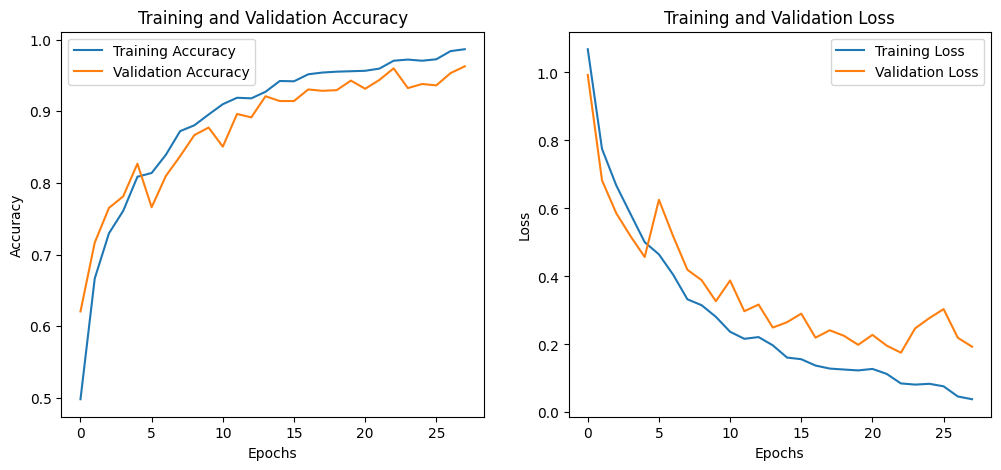

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(conv_second_model.history['accuracy'], label='Training Accuracy')
plt.plot(conv_second_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(conv_second_model.history['loss'], label='Training Loss')
plt.plot(conv_second_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [9]:
test_loss, test_accuracy = combined_model.evaluate(test_generator_aug)
print(f"Test accuracy: {test_accuracy:.2f}")

C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.9525 - loss: 0.1502
Test accuracy: 0.96


In [10]:
# identifying qrong predictions

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
from tabulate import tabulate

# Define the image dimensions and your model's class indices
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256  # Set to your model's input dimensions
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}  # Adjust based on your model's output classes

# Function to predict the tumor type
def predict_tumor_type(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = combined_model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

# Path to your test images and actual labels
test_dir = 'Final_Dataset/test'

wrong_predictions = []

# Iterate through the test images
for img_name, true_label in actual_labels.items():
    # Only predict if the image exists
    if os.path.exists(img_name):
        predicted_label = predict_tumor_type(img_name)

        # Check if the prediction is wrong
        if predicted_label != true_label:
            wrong_predictions.append((img_name, class_indices[predicted_label], class_indices[true_label]))

# Print wrong predictions as a table
if wrong_predictions:
    print("Wrong Predictions:",len(wrong_predictions),'/',len(actual_labels))
    print(tabulate(wrong_predictions, headers=["Image Name", "Predicted", "Actual"], tablefmt="grid"))
else:
    print("All predictions were correct!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

In [88]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have your actual labels and predicted labels
# actual_labels should be the true labels (the class indices)
# predicted_labels should be the labels predicted by your model

# Convert actual_labels to a list of true class indices
true_labels = []
for img_path, true_class in actual_labels.items():
    true_labels.append(true_class)

# Convert predicted_labels to a NumPy array if not already
predicted_labels = np.array([predict_tumor_type(img_path) for img_path in actual_labels.keys()])

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━

In [17]:
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)
# Print the DataFrame
print(report_df)

              precision  recall  f1-score  support
Glioma             0.95    0.94      0.95   244.00
Meningioma         0.93    0.94      0.93   248.00
No Tumor           0.99    0.98      0.98   300.00
Pituitary          0.98    0.99      0.99   265.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.96    0.96      0.96  1057.00
weighted avg       0.96    0.96      0.96  1057.00


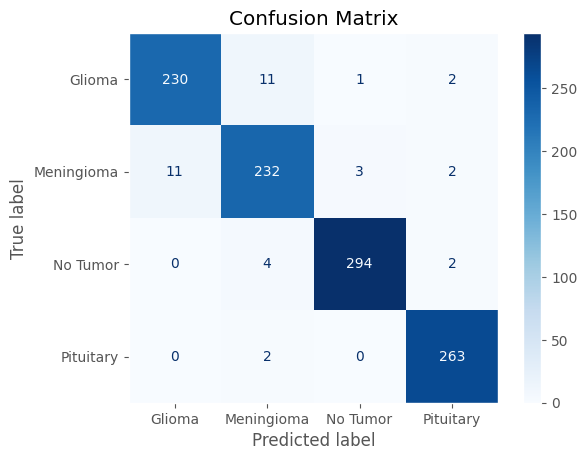

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are your actual labels and predicted labels respectively



# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2, 3])  # Assuming labels are [Glioma, Meningioma, No Tumor, Pituitary]

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the image dimensions and your model's class indices
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256  # Set to your model's input dimensions
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}  # Adjust based on your model's output classes

# Function to predict the tumor type
def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = combined_model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_indices[predicted_class]

    return predicted_label, predictions[0]

# Example usage
img_path = 'Final_Dataset/test/meningioma/meningioma_72.jpg'  # Change to your image path
predicted_label, probabilities = predict_tumor_type(img_path)

# Print the result
print(f"Predicted: {predicted_label}")
print("Probabilities:")
for label, prob in zip(class_indices.values(), probabilities):
    print(f"  {label}: {prob:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted: Meningioma
Probabilities:
  Glioma: 0.00%
  Meningioma: 1.00%
  No Tumor: 0.00%
  Pituitary: 0.00%


# Regularization

In [34]:
# Check the output shape after the conv layers
regular_model = models.Sequential()

# First conv layer (adjusted input size)
regular_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                                input_shape=(256, 256, 1), kernel_regularizer=reg))
regular_model.add(BatchNormalization())
regular_model.add(layers.MaxPooling2D((2, 2)))

# Second conv layer
regular_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
regular_model.add(layers.MaxPooling2D((2, 2)))

# Third conv layer
regular_model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=reg))
regular_model.add(layers.MaxPooling2D((2, 2)))

# Fourth conv layer
regular_model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=reg))
regular_model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer (flattening the output)
regular_model.add(layers.Flatten())

# Add Dense layers (ensure proper input size here)
regular_model.add(layers.Dense(128, activation='relu'))
regular_model.add(Dropout(0.3))
regular_model.add(layers.Dense(64, activation='relu'))
regular_model.add(layers.Dense(4, activation='softmax'))  # Adjusted to predict 4 classes

# Compile the model
regular_model.compile(optimizer=opt, loss=cce, metrics=['accuracy'])

# Print the model summary to verify the shapes
regular_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)            │ (None, 254, 254, 32)  │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_6         │ (None, 254, 254, 32)  │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_16              │ (None, 127, 127, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_17 (Conv2D)            │ (None, 125, 125, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_17              │ (None, 62, 62, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_18 (Conv2D)            │ (None, 60, 60, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_18              │ (None, 30, 30, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_19 (Conv2D)            │ (None, 28, 28, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_19              │ (None, 14, 14, 256)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_6 (Flatten)           │ (None, 50176)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_22 (Dense)              │ (None, 128)           │    6,422,656 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_23 (Dense)              │ (None, 64)            │        8,256 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_24 (Dense)              │ (None, 4)             │          260 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 6,819,140 (26.01 MB)

 Trainable params: 6,819,076 (26.01 MB)

 Non-trainable params: 64 (256.00 B)

In [35]:
# using same data gens for regularixation

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Specify hyperparameters for model
cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()
es = EarlyStopping(monitor='loss', patience=5,verbose=1)




In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_regular_model.keras',  # Path to save the model
    monitor='val_loss',  # Monitor the validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Save the model with the lowest validation loss
    verbose=1  # Verbosity mode, 1 = progress bar
)

In [38]:

import pickle

# Define the function to train the model and save the history

    # Model training
regular_history = regular_model.fit(
    train_generator_aug,
    verbose=1,
    validation_data=valid_generator_aug,
    epochs=100,
    callbacks=[es, checkpoint]  # Checkpoint callback is included here
)

    # Save the training history after training is completed
with open('regular_history.pkl', 'wb') as f:
    pickle.dump(regular_history.history, f)


# Now you can run other code while the model trains in the background


Epoch 1/100


C:\Users\PRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4204 - loss: 3.3888
Epoch 1: val_loss improved from inf to 1.83633, saving model to best_regular_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.4211 - loss: 3.3827 - val_accuracy: 0.6160 - val_loss: 1.8363
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6390 - loss: 1.2673
Epoch 2: val_loss improved from 1.83633 to 1.34358, saving model to best_regular_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.6390 - loss: 1.2667 - val_accuracy: 0.6702 - val_loss: 1.3436
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7091 - loss: 0.9369
Epoch 3: val_loss improved from 1.34358 to 1.01304, saving model to best_regular_model.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7090 - loss: 0.9368 - val_accuracy: 0.7262 - val_loss: 1.0130
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7141 - loss: 0.8109
Epoch 4: val_loss improved from 1.01304

In [40]:
from tensorflow.keras.models import load_model

# Load the model from the checkpoint
model = load_model('best_regular_model.keras')


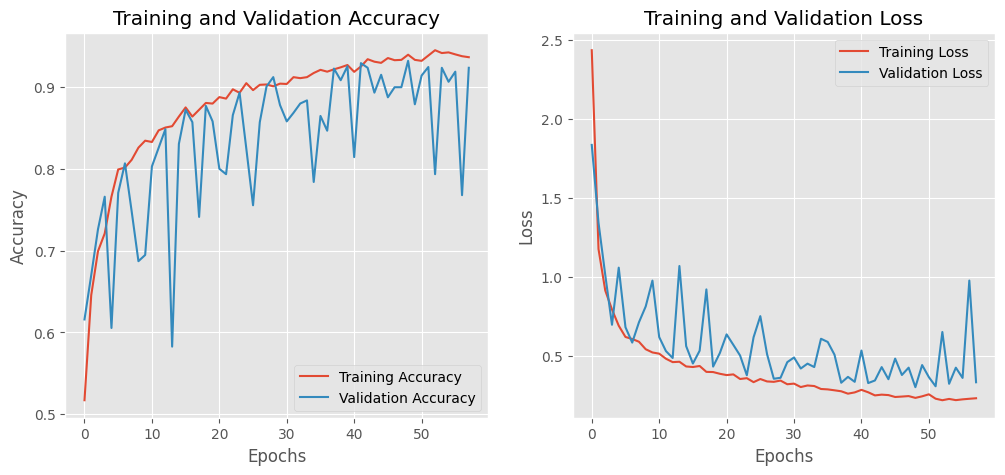

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(regular_history.history['accuracy'], label='Training Accuracy')
plt.plot(regular_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(regular_history.history['loss'], label='Training Loss')
plt.plot(regular_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [43]:
test_loss, test_accuracy = regular_model.evaluate(test_generator_aug)
print(f"Test accuracy: {test_accuracy:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 446ms/step - accuracy: 0.9047 - loss: 0.3194
Test accuracy: 0.92


In [44]:
# identifying qrong predictions

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
from tabulate import tabulate

# Define the image dimensions and your model's class indices
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256  # Set to your model's input dimensions
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}  # Adjust based on your model's output classes

# Function to predict the tumor type
def predict_tumor_type(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = regular_model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

# Path to your test images and actual labels
test_dir = 'Final_Dataset/test'

wrong_predictions = []

# Iterate through the test images
for img_name, true_label in actual_labels.items():
    # Only predict if the image exists
    if os.path.exists(img_name):
        predicted_label = predict_tumor_type(img_name)

        # Check if the prediction is wrong
        if predicted_label != true_label:
            wrong_predictions.append((img_name, class_indices[predicted_label], class_indices[true_label]))

# Print wrong predictions as a table
if wrong_predictions:
    print("Wrong Predictions:",len(wrong_predictions),'/',len(actual_labels))
    print(tabulate(wrong_predictions, headers=["Image Name", "Predicted", "Actual"], tablefmt="grid"))
else:
    print("All predictions were correct!")


NameError: name 'actual_labels' is not defined

In [50]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have your actual labels and predicted labels
# actual_labels should be the true labels (the class indices)
# predicted_labels should be the labels predicted by your model

# Convert actual_labels to a list of true class indices
true_labels = []
for img_path, true_class in actual_labels.items():
    true_labels.append(true_class)

# Convert predicted_labels to a NumPy array if not already
predicted_labels = np.array([predict_tumor_type(img_path) for img_path in actual_labels.keys()])

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [51]:
report = classification_report(true_labels, predicted_labels, target_names=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)
# Print the DataFrame
print(report_df)

              precision  recall  f1-score  support
Glioma             0.91    0.87      0.89   244.00
Meningioma         0.86    0.93      0.89   248.00
No Tumor           0.95    0.98      0.97   300.00
Pituitary          0.96    0.90      0.93   265.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.92    0.92      0.92  1057.00
weighted avg       0.92    0.92      0.92  1057.00


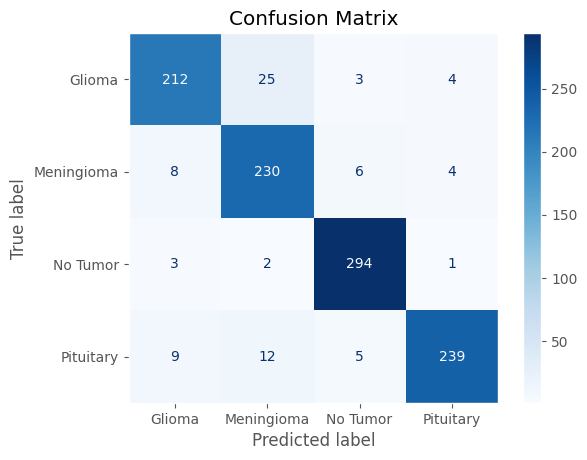

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are your actual labels and predicted labels respectively



# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2, 3])  # Assuming labels are [Glioma, Meningioma, No Tumor, Pituitary]

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()


In [54]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Function to compute Grad-CAM
def grad_cam(model, image, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    # Compute gradients with respect to the last conv layer
    grads = tape.gradient(class_output, conv_outputs)

    # Pool the gradients over all the axes except for the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    pooled_grads = pooled_grads.numpy()

    # Multiply each channel in the feature map array by its corresponding gradient
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Compute the mean of the feature map across all channels to get the heatmap
    heatmap = np.mean(conv_outputs, axis=-1)

    # Apply ReLU to the heatmap
    heatmap = np.maximum(heatmap, 0)

    # Normalize the heatmap to a range between 0 and 1
    heatmap /= np.max(heatmap)

    return heatmap

# Function to display the Grad-CAM heatmap
def display_gradcam(image, heatmap, alpha=0.4):
    # Resize heatmap to match input image size
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    
    # Apply colormap (e.g., JET) to the heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    # Superimpose the heatmap on the original image
    superimposed_img = heatmap * alpha + image
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

    # Display the image
    plt.imshow(superimposed_img, cmap='gray')
    plt.axis('off')
    plt.show()

# Assuming 'combined_model' is your trained model and 'img' is the input image
last_conv_layer_name = 'conv2d_29'  # The last conv layer in your model

# Load a test image and preprocess it (replace 'img_path' with your test image)
img_path = 'Final_Dataset/test/meningioma/meningioma_72.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
img = cv2.resize(img, (256, 256))  # Resize to match input shape
img = np.expand_dims(img, axis=(0, -1))  # Add batch and channel dimensions
img = img / 255.0  # Normalize
model_path = 'best_second_model.keras'
combined_model =load_model(model_path)
# Generate heatmap using Grad-CAM
heatmap = grad_cam(combined_model, img, last_conv_layer_name)

# Display Grad-CAM on the original image
display_gradcam(img[0], heatmap)


ValueError: The layer sequential_7 has never been called and thus has no defined output.

In [55]:
model_path = 'best_second_model.keras'
combined_model =load_model(model_path)

In [57]:
combined_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,457,038 (78.04 MB)

 Trainable params: 6,819,012 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,638,026 (52.02 MB)